# BREAST CANCER CLASSIFICATION

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

## 1. Look at the big picture

What problem are we solving, who is the end users?
- We’re solving a medical diagnostic problem
- End users are indeed doctors or medical professionals.

What is the desired outcome or objective?
- Desired outcome is whether the given tumor is malignant or benign

How should we frame this problem? 
- It is a classification problem, since we classify the tumor as malignant or benign.
- Binary Classification makes much more sense for this problem since we classify simply the tumor cancer or not cancer
- It is a supervised learning task since we have data already with the labels.

What performance metric should be used?
- Since we use classification, we have some metrics such as precision, recall, f1 score, auc/roc curve

## 2. Get the data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [4]:
raw_data = pd.read_csv("../../datasets/breast_cancer.csv")
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
raw_data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Our target variable (output) is the diagnosis column, which indicates whether a tumor is malignant (M) or benign (B). All other columns are input features that describe tumor characteristics and contribute, to varying degrees, to the model’s prediction.

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
raw_data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [13]:
raw_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 3. Discover and visualize

In [80]:
data = raw_data.copy()
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


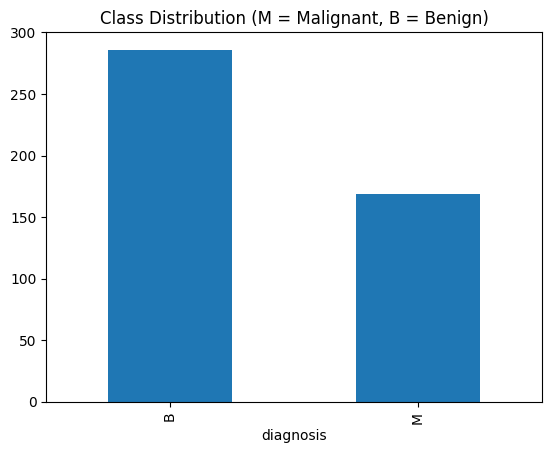

In [43]:
data["diagnosis"].value_counts().plot(
    kind='bar',
    title="Class Distribution (M = Malignant, B = Benign)"
)
plt.show()

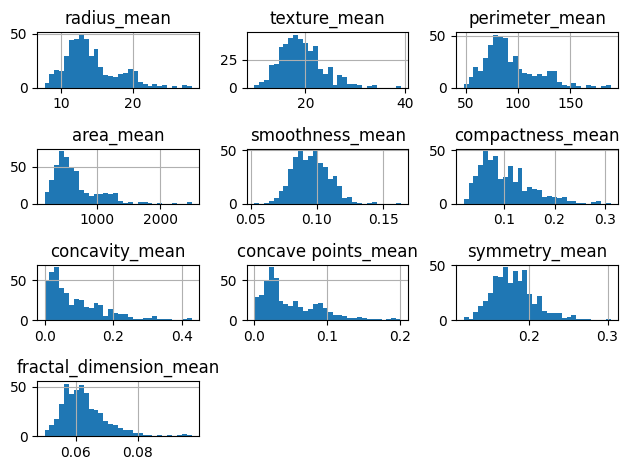

In [46]:
features = ["radius_mean", "texture_mean", 
            "perimeter_mean","area_mean",
            "smoothness_mean", "compactness_mean",
            "concavity_mean", "concave points_mean",
            "symmetry_mean", "fractal_dimension_mean"
           ]
data[features].hist(
    bins=30
)
plt.tight_layout()
plt.show()

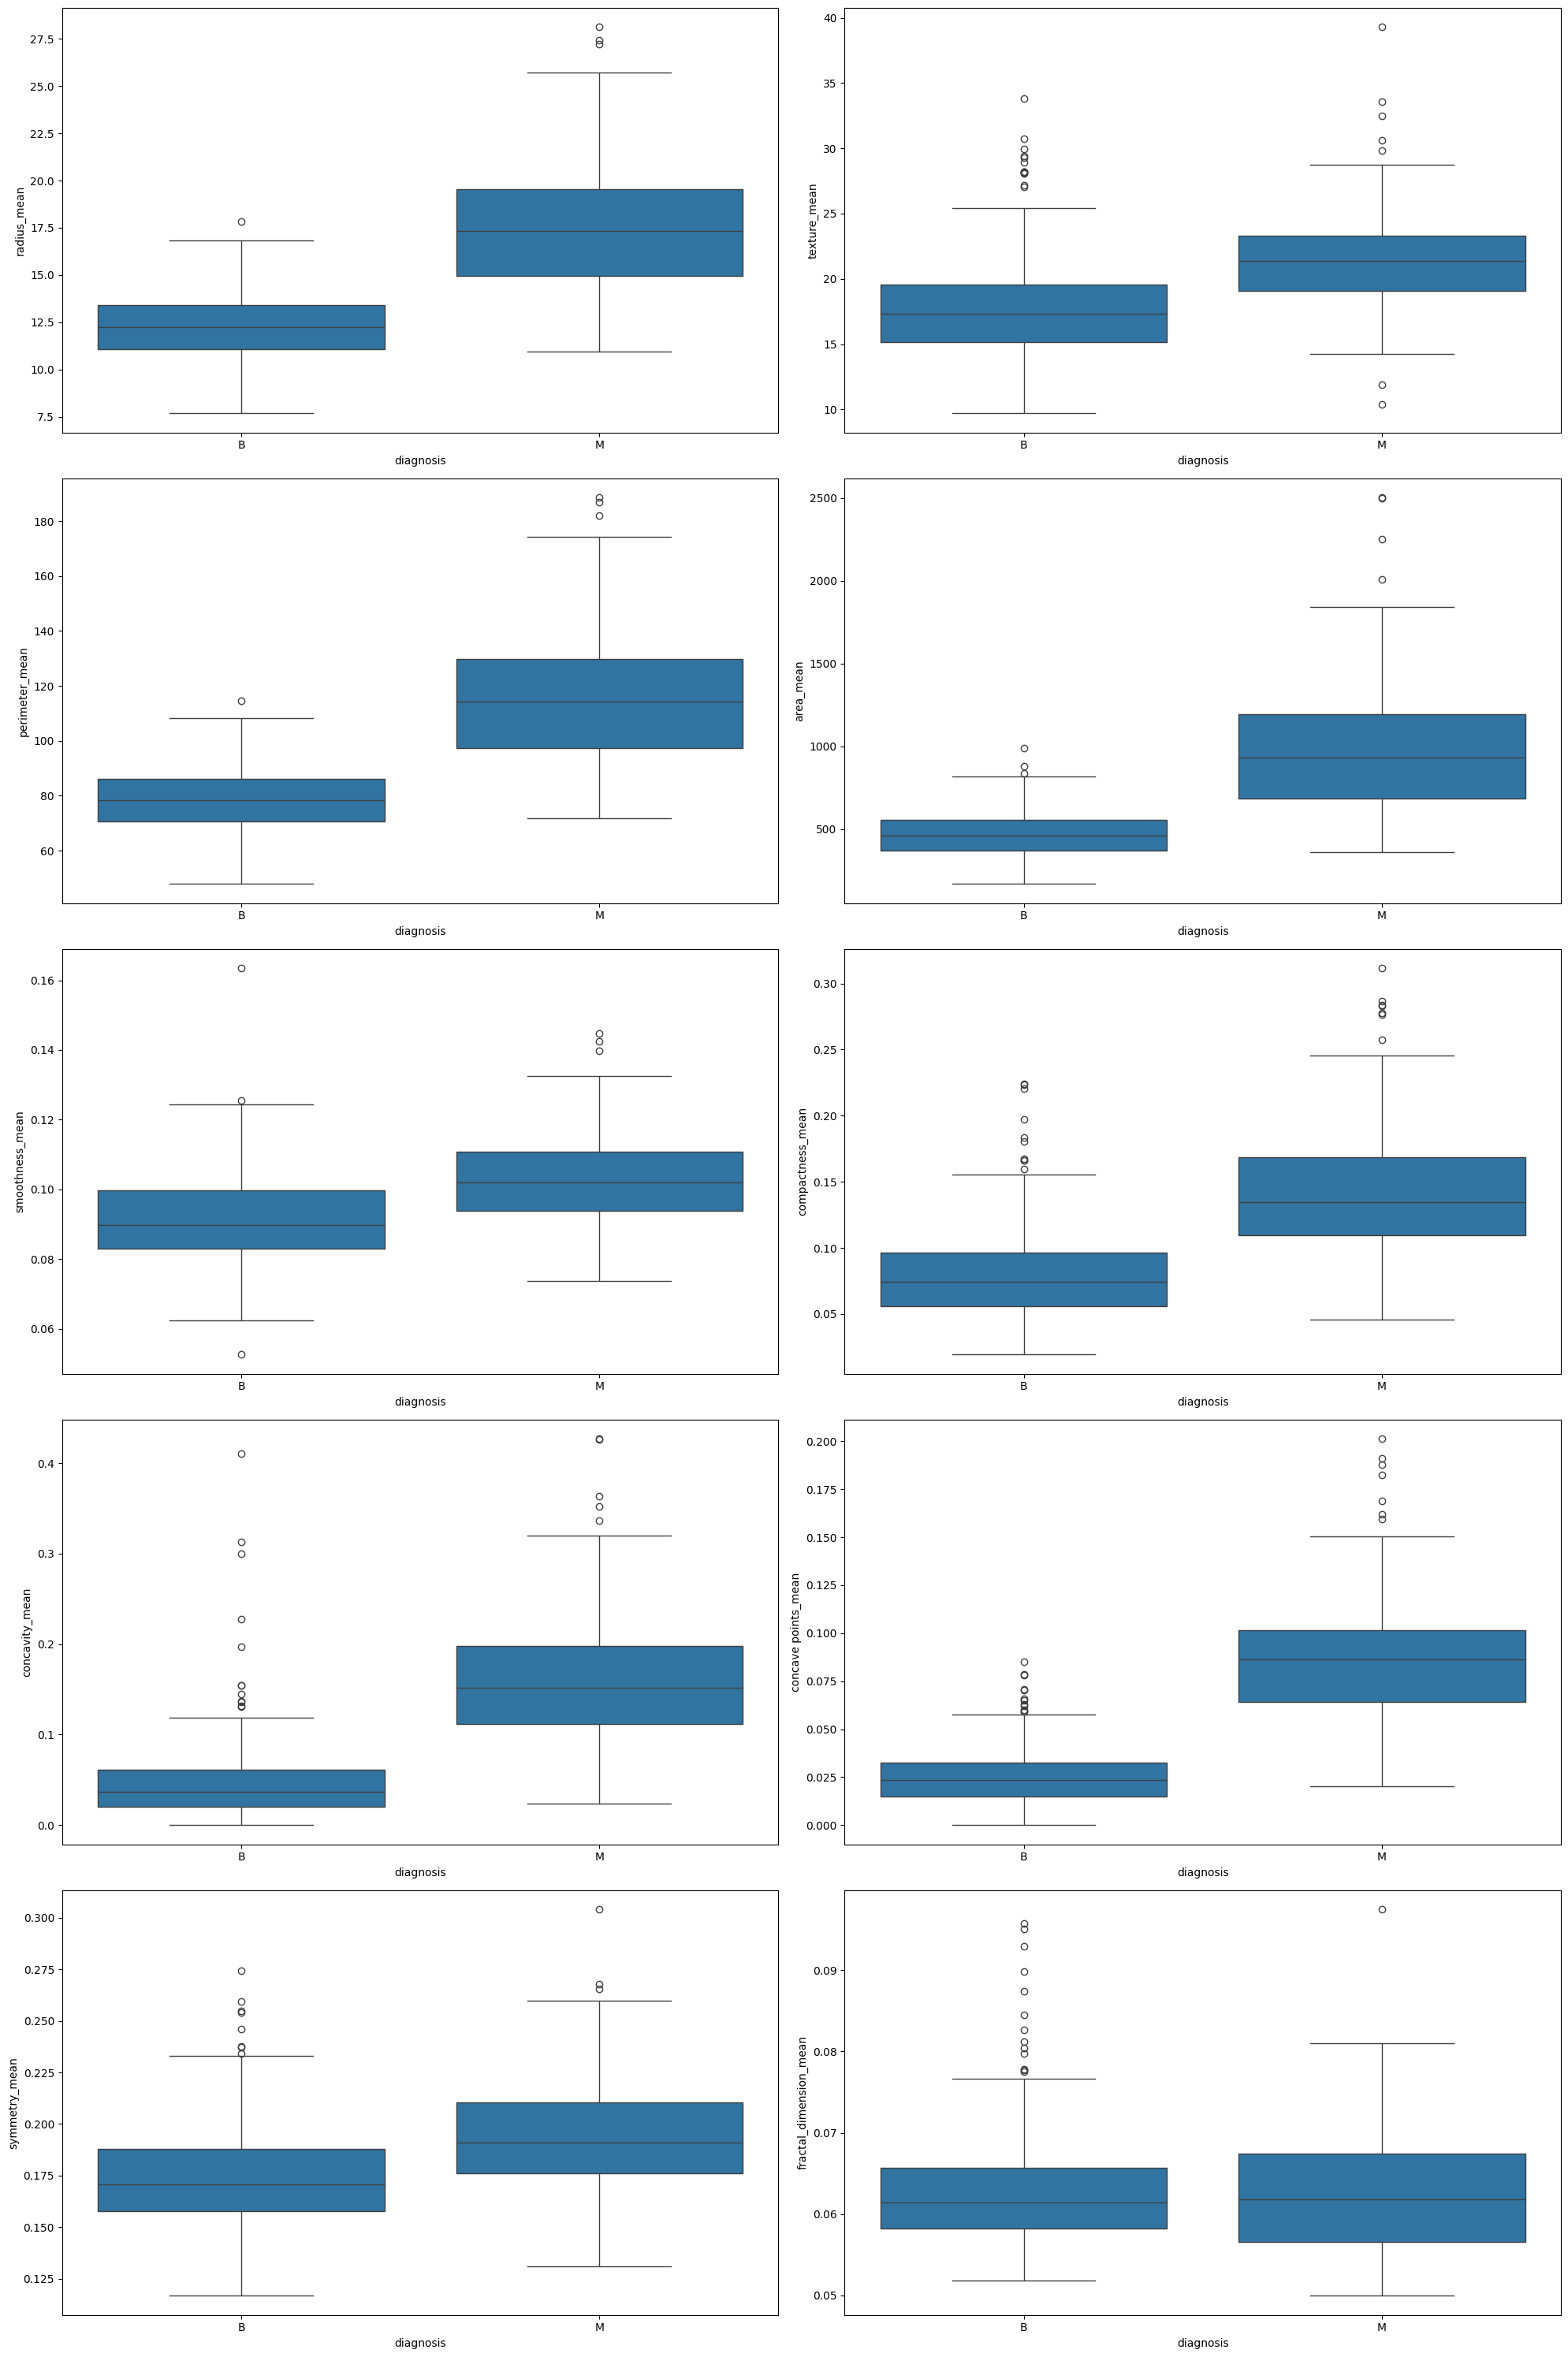

In [64]:
fig,axs = plt.subplots(5, 2, figsize=(20, 30))
axs = axs.flatten()  # 5x2

plt.xticks(rotation=360)
cmap = plt.cm.Set2

for idx, feature in enumerate(features):
    sns.boxplot(
        data=data,
        x="diagnosis",
        y=feature,
        ax=axs[idx]
    )
fig.tight_layout()
plt.show()

In [67]:
df_corr = data.copy()
df_corr["diagnosis_num"] = df_corr["diagnosis"].map({"M": 1, "B": 0})
corr_matrix = df_corr.drop(columns="diagnosis").corr(numeric_only=True)
corr_matrix["diagnosis_num"].sort_values(ascending=False)

diagnosis_num              1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
id                         0.053402
fractal_dimension_se       0

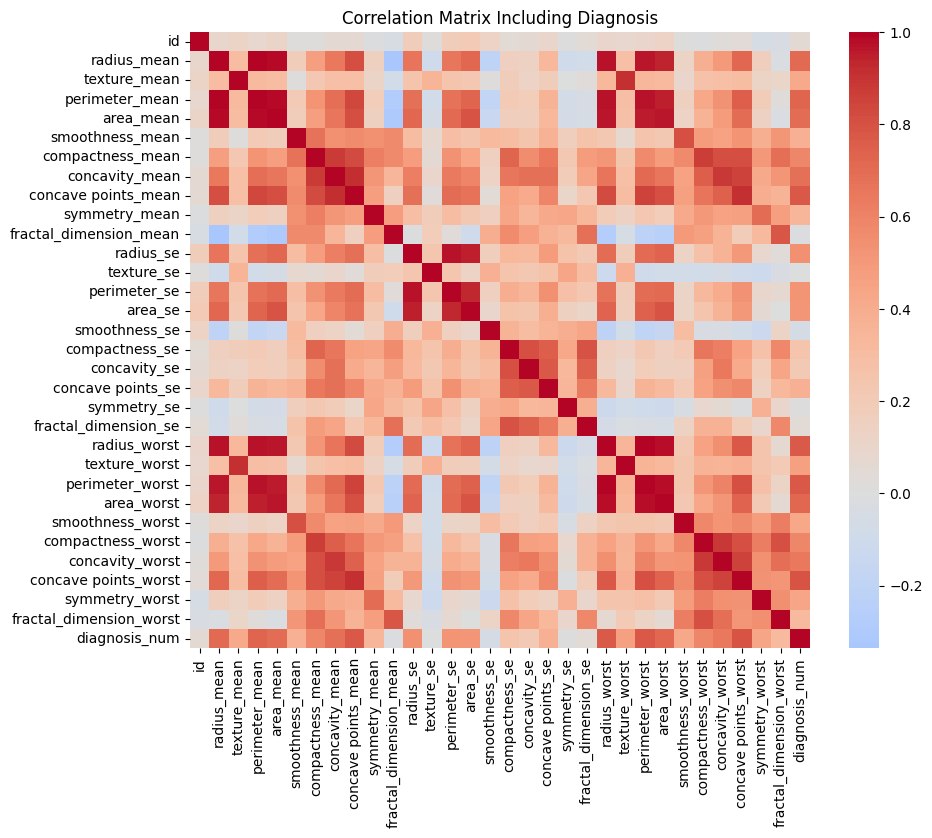

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix Including Diagnosis")
plt.show()

## 4. Prepare the Data for Machine Learning Algorithms

In [81]:
from sklearn.model_selection import train_test_split
X = raw_data.drop(columns=["diagnosis"])
y = raw_data["diagnosis"]  # M / B

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [82]:
X.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [83]:
y.isna().sum()

np.int64(0)

In [84]:
y_train = y_train.map({"M": 1, "B": 0})
y_test = y_test.map({"M": 1, "B": 0})

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocess_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [87]:
X_train_prepared = preprocess_pipeline.fit_transform(X_train)
X_test_prepared = preprocess_pipeline.transform(X_test)

The data was prepared using a preprocessing pipeline that includes target encoding and feature scaling. The pipeline was fit on the training set and applied consistently to the test set to prevent data leakage.

## 5. Select models and train

We will use SGDClassifier, RandomForestClassifier, LogisticRegression for this task and will see which one performs better.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("clf", LogisticRegression(max_iter=1000))
])

sgd_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("clf", SGDClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("clf", RandomForestClassifier(random_state=42))
])

models = {
    "Logistic Regression": log_reg_pipeline,
    "SGD Classifier": sgd_pipeline,
    "Random Forest": rf_pipeline
}

In [129]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score

results = {}
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}
for name, model in models.items():
    cv_scores = cross_validate(
        model,
        X_train,
        y_train,
        cv=3,
        scoring=scoring
    )
    y_pred_cv = cross_val_predict(
        model,
        X_train,
        y_train,
        cv=3
    )
    cm = confusion_matrix(y_train, y_pred_cv)
    results[name] = {
        "Accuracy": cv_scores["test_accuracy"].mean(),
        "Precision": cv_scores["test_precision"].mean(),
        "Recall": cv_scores["test_recall"].mean(),
        "F1": cv_scores["test_f1"].mean(),
        "ROC AUC": cv_scores["test_roc_auc"].mean(),
        "Confusion Matrix": cm
    }
results

{'Logistic Regression': {'Accuracy': np.float64(0.9758191007319623),
  'Precision': np.float64(0.9819223985890653),
  'Recall': np.float64(0.9530075187969925),
  'F1': np.float64(0.9671278421278422),
  'ROC AUC': np.float64(0.9953711031965878),
  'Confusion Matrix': array([[282,   3],
         [  8, 162]])},
 'SGD Classifier': {'Accuracy': np.float64(0.9559951202509586),
  'Precision': np.float64(0.9161119390627587),
  'Recall': np.float64(0.9766081871345028),
  'F1': np.float64(0.9438236811812805),
  'ROC AUC': np.float64(0.9947544299344854),
  'Confusion Matrix': array([[269,  16],
         [  4, 166]])},
 'Random Forest': {'Accuracy': np.float64(0.9538021377948182),
  'Precision': np.float64(0.9469862440747282),
  'Recall': np.float64(0.929406850459482),
  'F1': np.float64(0.9376682521535805),
  'ROC AUC': np.float64(0.987804489293409),
  'Confusion Matrix': array([[276,   9],
         [ 12, 158]])}}

In [130]:
scores_df = pd.DataFrame({
    model: {
        k: v for k, v in metrics.items() if k != "Confusion Matrix"
    }
    for model, metrics in results.items()
}).T

scores_df.sort_values("Recall", ascending=False)

,Accuracy,Precision,Recall,F1,ROC AUC
SGD Classifier,0.955995,0.916112,0.976608,0.943824,0.994754
Logistic Regression,0.975819,0.981922,0.953008,0.967128,0.995371
Random Forest,0.953802,0.946986,0.929407,0.937668,0.987804


Each metric answers a different question:

- Recall → “How many malignant cases do we catch?”
- Precision → “How many predicted malignant are truly malignant?”
- F1 → Balance between precision & recall
- ROC AUC → Overall ranking ability (threshold-independent)
- Accuracy → Least important here (medical context)

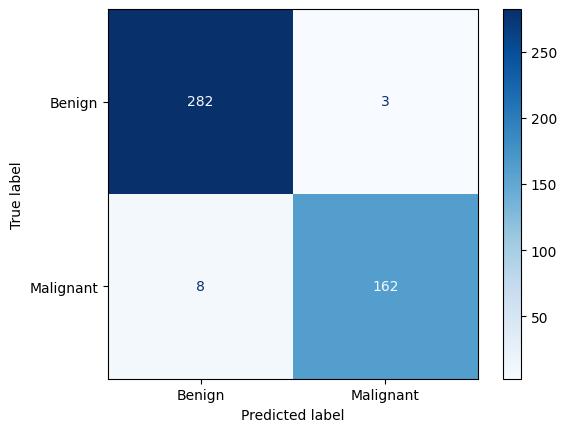

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_logistic = cross_val_predict(models["Logistic Regression"], X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_pred_logistic)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malignant"]
)

disp.plot(cmap="Blues")
plt.show()

FN = 8 (missed cancers)
FP = 3 (false alarms)

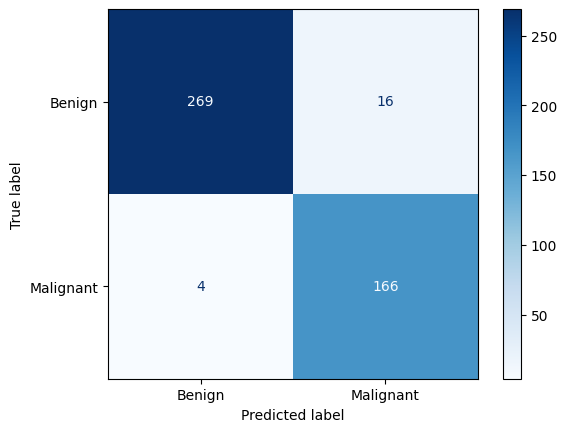

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_sgd = cross_val_predict(models["SGD Classifier"], X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_pred_sgd)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malignant"]
)

disp.plot(cmap="Blues")
plt.show()

FN = 4   (missed cancers)
FP = 16  (false alarms)

- <b>Logistic Regression:</b>

  - Outputs well-calibrated probabilities
  - Decision boundary is stable
  - Small data changes → small behavior changes

- <b>SGD:</b>

  - Optimization-dependent
  - Sensitive to: learning rate, regularization, random state
  - Less stable across folds

<b>Logistic Regression is the best model:</b>
- Has better F1
- Has better ROC AUC

In [135]:
best_model_pipeline = models["Logistic Regression"] 

y_scores = cross_val_predict(
    best_model_pipeline,
    X_train,
    y_train,
    cv=5,
    method="predict_proba"
)[:, 1]

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
auc_score = roc_auc_score(y_train, y_scores)

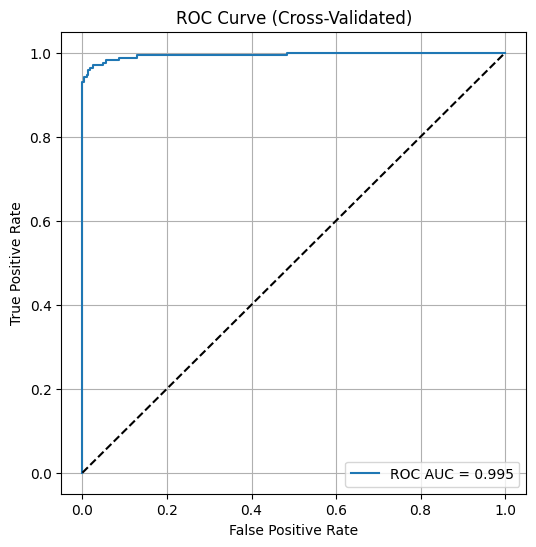

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.show()

## 6. Fine-Tuning

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
pipe = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("clf", LogisticRegression(
        solver="saga",
        max_iter=20000,
    ))
])

param_grid = {
    "clf__C": np.logspace(-3, 3, 7),
    "clf__l1_ratio": [0.0, 0.5, 1.0]  # L2 → ElasticNet → L1
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...ver='saga'))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'clf__C': array([1.e-03...e+02, 1.e+03]), 'clf__l1_ratio': [0.0, 0.5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [160]:
grid_search.best_params_

{'clf__C': np.float64(100.0), 'clf__l1_ratio': 0.5}

In [162]:
best_model = grid_search.best_estimator_
best_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception)

In [163]:
best_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception)

In [164]:
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_proba

array([1.81383039e-07, 1.00000000e+00, 2.76739438e-05, 5.38673917e-01,
       9.46524887e-01, 3.43315167e-07, 9.61972072e-01, 1.93342146e-08,
       1.93896701e-06, 7.67022584e-06, 8.97305773e-01, 1.32609528e-10,
       1.00000000e+00, 5.10528380e-06, 7.13376217e-06, 2.04166901e-12,
       4.79121491e-03, 4.45495997e-08, 9.06398751e-02, 6.42428886e-09,
       1.82057791e-06, 2.91577268e-06, 1.00000000e+00, 9.99999955e-01,
       6.31739531e-01, 1.29492768e-08, 2.96905883e-07, 9.99999397e-01,
       9.99999965e-01, 1.00000000e+00, 1.00000000e+00, 1.41245395e-06,
       1.00000000e+00, 1.00000000e+00, 4.10677831e-07, 1.31242205e-05,
       7.43451802e-06, 3.83938978e-15, 9.99969424e-01, 1.72035998e-01,
       8.48215481e-11, 3.71610635e-09, 9.99368031e-01, 2.65382624e-05,
       5.43133575e-04, 9.99965935e-01, 1.56109654e-03, 9.99999999e-01,
       9.79490425e-09, 1.44140024e-06, 1.00000000e+00, 9.99983432e-01,
       1.35749975e-05, 6.08300436e-09, 1.63862852e-08, 9.99998934e-01,
      

In [165]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_proba))

Accuracy: 0.9736842105263158
Precision: 0.975609756097561
Recall: 0.9523809523809523
F1: 0.963855421686747
ROC AUC: 0.9801587301587302


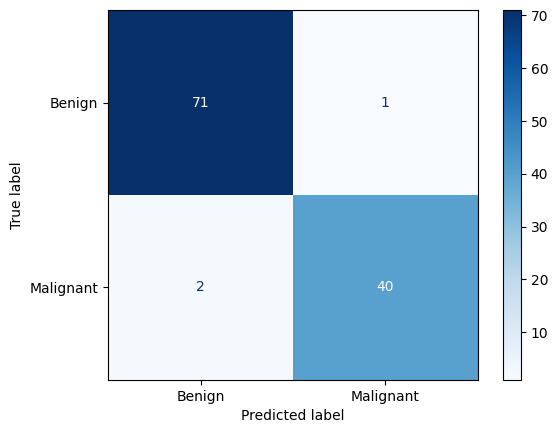

In [166]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malignant"]
)
disp.plot(cmap="Blues")

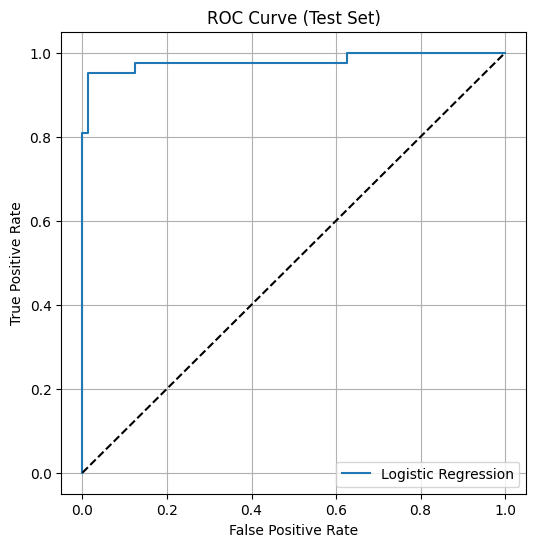

In [167]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

The final tuned Logistic Regression model was evaluated on a held-out test set. The model demonstrates strong generalization performance with high recall and ROC-AUC, making it suitable for medical diagnostic support where minimizing missed malignant cases is critical